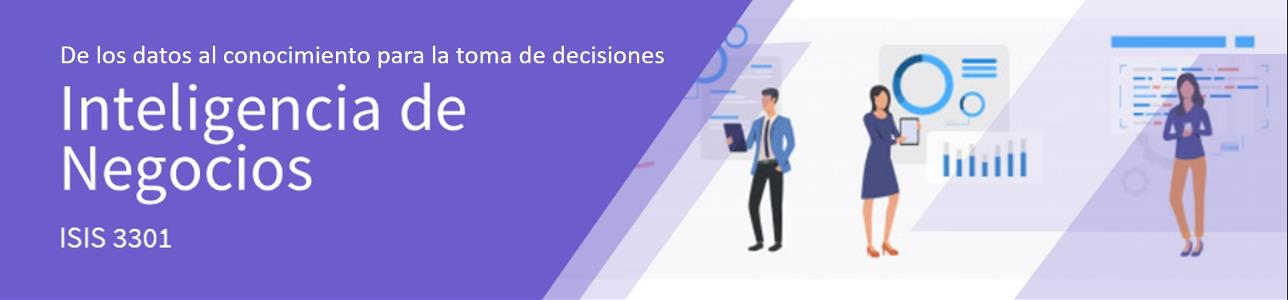

## Objetivos

*   Analizar conjuntos de datos no estructurados.
*   Aplicar diferentes técnicas de pre-procesamiento de textos.



## Problema
<p style="text-align: justify;"> El departamento de TI ha desarrollado un servidor de correo para brindar a todos los empleados una cuenta propia donde puedan manejar la información de la empresa. Sin embargo, debido al mal manejo de esta y la falta de capacitación, los directivos se han dado cuenta que a los servidores están llegando varios mensajes <i>Spam</i> que pueden comprometer la seguridad de la información. Para solventar este problema, se quiere construir un sistema el cual permita clasificar y descartar un mensaje <i>Spam</i> antes que llegue a los servidores.

### 0. Reflexión sobre el proceso a seguir y conocimientos requeridos
A la luz del caso dado, reflexionar sobre los pasos a seguir para resolver el problema y sobre los conceptos que necesitas para hacerlo.
Piensa en particular en lo que aún no sabes para resolver el caso. <span style="color:red">Incluye en este punto, una imagen para representar el proceso y subraya las partes que desconoces. </spam>

### 1. Instalación e importanción de librerías.


In [1]:
# Librería para manejar las contracciones que se presentan en el inglés.
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 4.9 MB/s eta 0:00:00


In [2]:
# librería para manejar las flexiones gramaticales en el idioma inglés.
!pip install inflect
# Manejo de gráficas
!pip install scikit-plot


In [3]:
# librería Natural Language Toolkit, usada para trabajar con textos
import nltk
# Punkt permite separar un texto en frases.
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
# Descarga todas las palabras vacias, es decir, aquellas que no aportan nada al significado del texto
# ¿Cuales son esas palabras vacías?

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
# Descarga de paquete WordNetLemmatizer, este es usado para encontrar el lema de cada palabra
# ¿Qué es el lema de una palabra? ¿Qué tan dificil puede ser obtenerlo, piensa en el caso en que tuvieras que escribir la función que realiza esta tarea?
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [6]:
# Instalación de librerias
import pandas as pd
import numpy as np
import sys
!{sys.executable} -m pip install pandas-profiling

import re, string, unicodedata
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix


from sklearn.base import BaseEstimator, ClassifierMixin

import matplotlib.pyplot as plt


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.6/262.6 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 81.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 86.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=7337b4e0b62b8dc6a28fb81c26884f4054e68de06eaee3fbd00063d6fb186356
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3

### 2. Perfilamiento y entendimiento de los datos



#### Lectura de los datos.

In [8]:
# Uso de la libreria pandas para la lectura de archivos
data=pd.read_csv('SPAM_text_message_20170820__Data.csv', sep=',', encoding = 'utf-8')
# Asignación a una nueva variable de los datos leidos
data_t=data


In [9]:
data_t

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
data_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


#### Entendimiento de los Datos

Para entender los mensajes, se realizan 'estadísticas descriptivas' para poder obtener un análisis de los textos.

<span style="color:red"> En este punto, dados los ejemplos, te invitamos a completar la asignación para obtener la moda y el valor máximo. </span>

In [17]:
from scipy import stats as st
from collections import Counter
import string

textos = data_t.copy()
textos['Conteo'] = [len(x) for x in textos['Message']]
textos['Moda'] = [Counter([word.lower().strip(string.punctuation) for word in (i.split(' '))]).most_common()[0][0] for i in textos['Message']]
textos['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in textos['Message']]
textos['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in textos['Message']]

# Se realiza un perfilamiento de los datos con la librería pandas profiling
#ProfileReport(textos)

In [18]:
textos

,Category,Message,Conteo,Moda,Max,Min
0,ham,"Go until jurong point, crazy.. Available only ...",111,go,9,1
1,ham,Ok lar... Joking wif u oni...,29,ok,6,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,to,19,1
3,ham,U dun say so early hor... U c already then say...,49,u,7,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,he,6,1
...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,is,17,1
5568,ham,Will ü b going to esplanade fr home?,36,will,9,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,pity,12,1
5570,ham,The guy did some bitching but I acted like i'd...,125,the,10,1


### 3. Preparación de datos

Para poder realizar el pre-procesamiento de los datos, es recomendable pasar por tres etapas:
* Limpieza de los datos.
* Tokenización.
* Normalización.

<span style="color:red">!!! Antes de ver la solución, revisa alternativas para realizar las tres etapas previas.</span>

Para mayor información, pueden consultar el [siguiente artículo](https://medium.com/datos-y-ciencia/preprocesamiento-de-datos-de-texto-un-tutorial-en-python-5db5620f1767
).

#### **3.1 Limpieza de los datos**
Para dejar el archivo en texto plano, sobre todo cuando vienen de diferentes fuentes como HTML, Twitter, XML, entre otros. También para eliminar caracteres especiales y pasar todo a minúscula.

<span style="color:red"> En este punto te invitamos a completar las funciones faltantes, como convertir los elementos de una lista a minúsculas (to_lowercase) y para eliminar los stowords (remove_stopwords) <span>

In [19]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        if word is not None:
          new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
          new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        if word is not None:
            new_word = word.lower()
            new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        if word is not None:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    print(words)
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
            print("if " + new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

def preprocessing(words):
    words = to_lowercase(words)
    words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words

#### **3.2 Tokenización**
La tokenización permite dividir frases u oraciones en palabras. Con el fin de desglozar las palabras correctamente para el posterior análisis. Pero primero, se realiza una corrección de las contracciones que pueden estar presentes en los textos.

In [20]:
data_t['Message'] = data_t['Message'].apply(contractions.fix) #Aplica la corrección de las contracciones

In [25]:
import nltk
nltk.download('punkt_tab')

data_t['words'] = data_t['Message'].apply(word_tokenize)
data_t.head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,Category,Message,words
0,ham,"Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy, .., Avail..."
1,ham,Ok lar... Joking wif you oni...,"[Ok, lar, ..., Joking, wif, you, oni, ...]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,ham,YOU dun say so early hor... YOU c already then...,"[YOU, dun, say, so, early, hor, ..., YOU, c, a..."
4,ham,"Nah I do not think he goes to usf, he lives ar...","[Nah, I, do, not, think, he, goes, to, usf, ,,..."


In [26]:
data_t['words'].dropna()

,words
0,"[Go, until, jurong, point, ,, crazy, .., Avail..."
1,"[Ok, lar, ..., Joking, wif, you, oni, ...]"
2,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,"[YOU, dun, say, so, early, hor, ..., YOU, c, a..."
4,"[Nah, I, do, not, think, he, goes, to, usf, ,,..."
...,...
5567,"[This, is, the, 2nd, time, we, have, tried, 2,..."
5568,"[Will, ü, b, going, to, esplanade, fr, home, ?]"
5569,"[Pity, ,, *, was, in, mood, for, that, ., So, ..."
5570,"[The, guy, did, some, bitching, but, I, acted,..."


In [27]:
data_t.shape

(5572, 3)

In [28]:
data_t['words'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5572 entries, 0 to 5571
Series name: words
Non-Null Count  Dtype 
--------------  ----- 
5572 non-null   object
dtypes: object(1)
memory usage: 43.7+ KB


In [29]:
data_t['words1']=data_t['words'].apply(preprocessing) #Aplica la eliminación del ruido

data_t.head()

Streaming output truncated to the last 5000 lines.
['yes', ':', ')', 'it', 'completely', 'in', 'out', 'of', 'form', ':', ')', 'clark', 'also', 'utter', 'waste', '.']
['honeybee', 'said', ':', '*', 'i', 'am', 'd', 'sweetest', 'in', 'd', 'world', '*', 'god', 'laughed', '&', 'amp', ';', 'said', ':', '*', 'wait', ',', 'you', 'havnt', 'met', 'd', 'person', 'reading', 'this', 'message', '*', 'moral', ':', 'even', 'god', 'can', 'crack', 'jokes', '!', 'gm+gn+ge+gn', ':', ')']
['thanks', '.', 'it', 'was', 'only', 'from', 'tescos', 'but', 'quite', 'nice', '.', 'all', 'gone', 'now', '.', 'speak', 'soon']
['what', 'is', 'a', 'feathery', 'bowa', '?', 'is', 'that', 'something', 'guys', 'have', 'that', 'i', 'do', 'not', 'know', 'about', '?']
['even', 'i', 'can', 'not', 'close', 'my', 'eyes', 'you', 'are', 'in', 'me', 'our', 'vava', 'playing', 'umma', ':', '-d']
['2', 'laptop', '...', 'i', 'noe', 'infra', 'but', 'too', 'slow', 'lar', '...', 'i', 'wan', 'fast', 'one']
if two
['you', 'have', 'won', 'a',

,Category,Message,words,words1
0,ham,"Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy, .., Avail...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif you oni...,"[Ok, lar, ..., Joking, wif, you, oni, ...]","[ok, lar, joking, wif, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[free, entry, two, wkly, comp, win, fa, cup, f..."
3,ham,YOU dun say so early hor... YOU c already then...,"[YOU, dun, say, so, early, hor, ..., YOU, c, a...","[dun, say, early, hor, c, already, say]"
4,ham,"Nah I do not think he goes to usf, he lives ar...","[Nah, I, do, not, think, he, goes, to, usf, ,,...","[nah, think, goes, usf, lives, around, though]"


#### **3.3. Normalización**
En la normalización de los datos se realiza la eliminación de prefijos y sufijos, además de realizar una lemmatización.

<span style="color:red">En este punto te invitamos a buscar opciones para completar las funciones de Stem_words y de Lemmatize_verbs</span>

In [ ]:
def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def stem_and_lemmatize(words):
    stems = stem_words(words)
    lemmas = lemmatize_verbs(words)
    return stems + lemmas
#    return words

data_t['words'] = data_t['words'].apply(stem_and_lemmatize) #Aplica lematización y Eliminación de Prefijos y Sufijos.
data_t.head()

,Category,Message,words,words1
0,ham,"Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy, .., Avail...",None
1,ham,Ok lar... Joking wif you oni...,"[Ok, lar, ..., Joking, wif, you, oni, ...]",None
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",None
3,ham,YOU dun say so early hor... YOU c already then...,"[YOU, dun, say, so, early, hor, ..., YOU, c, a...",None
4,ham,"Nah I do not think he goes to usf, he lives ar...","[Nah, I, do, not, think, he, goes, to, usf, ,,...",None


##### **3.4 Selección de campos**

Primero, se separa la variable predictora y los textos que se van a utilizar.

In [30]:
data_t['words'] = data_t['words'].apply(lambda x: ' '.join(map(str, x)))
data_t

,Category,Message,words,words1
0,ham,"Go until jurong point, crazy.. Available only ...","Go until jurong point , crazy .. Available onl...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif you oni...,Ok lar ... Joking wif you oni ...,"[ok, lar, joking, wif, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, two, wkly, comp, win, fa, cup, f..."
3,ham,YOU dun say so early hor... YOU c already then...,YOU dun say so early hor ... YOU c already the...,"[dun, say, early, hor, c, already, say]"
4,ham,"Nah I do not think he goes to usf, he lives ar...","Nah I do not think he goes to usf , he lives a...","[nah, think, goes, usf, lives, around, though]"
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact y...,This is the 2nd time we have tried 2 contact y...,"[2nd, time, tried, two, contact, 750, pound, p..."
5568,ham,Will ü b going to esplanade fr home?,Will ü b going to esplanade fr home ?,"[u, b, going, esplanade, fr, home]"
5569,ham,"Pity, * was in mood for that. So...any other s...","Pity , * was in mood for that . So ... any oth...","[pity, mood, suggestions]"
5570,ham,The guy did some bitching but I acted like i w...,The guy did some bitching but I acted like i w...,"[guy, bitching, acted, like, would, interested..."


In [31]:
X_data, y_data = data_t['words'],data_t['Category']
y_data = (y_data == 'spam').astype(int)
y_data

,Category
0,0
1,0
2,1
3,0
4,0
...,...
5567,1
5568,0
5569,0
5570,0


Primero, se transforma el texto con una transformación binaria 1 a 1.

In [32]:
dummy = CountVectorizer(binary=True)
X_dummy = dummy.fit_transform(X_data)
print(X_dummy.shape)
X_dummy.toarray()[0]

(5572, 8638)


array([0, 0, 0, ..., 0, 0, 0])

También, se puede realizar el conteo de las palabras presentes.

In [33]:
count = CountVectorizer()
X_count = count.fit_transform(X_data)
print(X_count.shape)
X_count.toarray()[0]

(5572, 8638)


array([0, 0, 0, ..., 0, 0, 0])

O, se puede realizar la transformación Term-frecuency times inverse Document-frecuency.

<span style="color:red">En este punto te invitamos a buscar opciones para completar la matriz con esta estrategia de TF_IDF</span>

In [34]:
# TODO: A completar
tf_idf = TfidfVectorizer()
X_tf_idf = tf_idf.fit_transform(X_data)

print(X_tf_idf.shape)
X_tf_idf.toarray()[0]

(5572, 8638)


array([0., 0., 0., ..., 0., 0., 0.])

## 4. Creación y Aplicación del modelo
Una vez se tiene la representación vectorial de cada uno de los textos se debe crear un modelo que permita clasificarlos en las categorias correspondientes. Para esto se pueden usar cualquiera de las representaciones anteriormente creadas.

<span style="color:red"> Te invitamos a terminar el ejercicio y compartir tus resultados. </span>

In [37]:
from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_tf_idf, y_data, test_size=0.2, random_state=42
)

print(f"Forma de X_train: {X_train.shape}")
print(f"Forma de X_test: {X_test.shape}")

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Crear el modelo
model = LogisticRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir sobre los datos de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy * 100:.2f}%")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))

# Nuevo texto para clasificar
nuevo_texto = ["Great offer to win Iphone 16 FREE!!!!"]

# Transformar el nuevo texto a TF-IDF
nuevo_texto_tfidf = tf_idf.transform(nuevo_texto)

# Predecir la categoría
categoria_predicha = model.predict(nuevo_texto_tfidf)
print(f"El texto se clasifica como: {'spam' if categoria_predicha[0] == 1 else 'no spam'}")

Forma de X_train: (4457, 8638)
Forma de X_test: (1115, 8638)
Precisión del modelo: 96.59%

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.74      0.85       149

    accuracy                           0.97      1115
   macro avg       0.98      0.87      0.92      1115
weighted avg       0.97      0.97      0.96      1115


Matriz de confusión:
[[966   0]
 [ 38 111]]
El texto se clasifica como: spam
